In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Licensing_2011_with_Labels.csv')

# Remove duplicates in the "Document_id" column
df = df.drop_duplicates(subset='Document_id')

# Save the modified DataFrame to a new CSV file
df.to_csv('/content/output_file.csv', index=False)


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Extract the 'content' column
contents = df['Content']

# Preprocess the text data if necessary (e.g., remove punctuation and lowercase)
# For simplicity, we'll assume the text is already preprocessed

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(contents)

# Calculate cosine similarity between text vectors
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# You can use clustering techniques like K-Means to group similar content
# Define the number of clusters (you can adjust this based on your needs)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(cosine_similarities)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Save the result to a new CSV file
df.to_csv('/content/output_file_with_clusters_10.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords

# Download NLTK stop words
nltk.download('stopwords')

# Extract the 'Content' column
contents = df['Content']

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to each content in the DataFrame
df['Content'] = df['Content'].apply(preprocess_text)

# Vectorize the preprocessed text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content'])

# Calculate cosine similarity between text vectors
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# You can use clustering techniques like K-Means to group similar content
# Define the number of clusters (you can adjust this based on your needs)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(cosine_similarities)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Save the result to a new CSV file
df.to_csv('/content/output_file_with_clusters_10.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


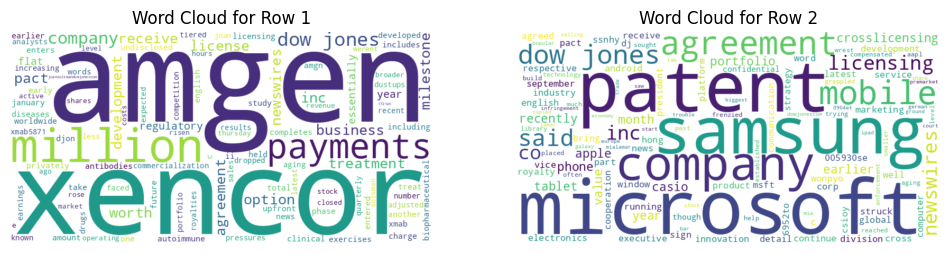

In [18]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Filter data for cluster 1
cluster_1_data = df[df['cluster'] == 1]

# Create a WordCloud for the first row in cluster 1
text_for_wordcloud_1 = cluster_1_data['Content'].iloc[0]
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud_1)

# Create a WordCloud for the second row in cluster 1
text_for_wordcloud_2 = cluster_1_data['Content'].iloc[1]
wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud_2)

# Plot the WordClouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for Row 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.title('Word Cloud for Row 2')
plt.axis('off')

plt.show()